In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import r2_score

In [ ]:
model_list = []
mae_list = []
mse_list = []

# --

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# target as position

In [ ]:
X = merged_df[['lap', 'duration_seconds']]
y = merged_df['position']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'merged_df' is not defined

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 38.20613477175139


In [ ]:
example_data = [[841, 153, 5, 10]]
predicted_duration = rf_regressor.predict(example_data)
print("Predicted Pit Stop Duration:", predicted_duration[0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 4 features, but RandomForestRegressor is expecting 2 features as input.

# target as laptime

In [ ]:
lap_times = pd.read_csv("lapTimes.csv", encoding='ISO-8859-1')
pit_stops = pd.read_csv("pitStops.csv", encoding='ISO-8859-1')
drivers = pd.read_csv("drivers.csv", encoding='ISO-8859-1')
driver_standings = pd.read_csv("driverStandings.csv", encoding='ISO-8859-1')
races = pd.read_csv("races.csv", encoding='ISO-8859-1')
results = pd.read_csv("results.csv", encoding='ISO-8859-1')
circuits = pd.read_csv("circuits.csv", encoding='ISO-8859-1')

In [ ]:
merged_data = pd.merge(lap_times, pit_stops, on=["raceId", "driverId", "lap"], how="left", suffixes = ('_lap', '_pit'))
merged_data = pd.merge(merged_data, drivers, on="driverId", how="left")
merged_data = pd.merge(merged_data, driver_standings, on=["raceId", "driverId"], how="left")
merged_data = pd.merge(merged_data, races, on="raceId", how="left")
merged_data = pd.merge(merged_data, results, on=["raceId", "driverId"], how="left", suffixes=('_x', '_result'))

merged_data = pd.merge(merged_data, circuits, on="circuitId", how="left")

merged_data

merged_data.info()
# merged_data = merged_data.drop(columns=['time_lap', 'time_pit', 'duration', 'driverRef', 'number_x', 'code', 'forename', 'surname', 'dob', 'nationality', 'url_x', 'positionText_x', 'name_x', 'time_x', 'url_y', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'positionText_result', 'time_result', 'fastestLapTime', 'fastestLapSpeed', 'circuitRef', 'name_y', 'location', 'country', 'alt', 'url'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36093 entries, 0 to 36092
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   raceId               36093 non-null  int64  
 1   driverId             36093 non-null  int64  
 2   lap                  36093 non-null  int64  
 3   position_x           36093 non-null  int64  
 4   time_lap             36093 non-null  object 
 5   milliseconds_lap     36092 non-null  float64
 6   stop                 1598 non-null   float64
 7   time_pit             1598 non-null   object 
 8   duration             1598 non-null   object 
 9   milliseconds_pit     1598 non-null   float64
 10  driverRef            36093 non-null  object 
 11  number_x             18252 non-null  float64
 12  code                 36093 non-null  object 
 13  forename             36093 non-null  object 
 14  surname              35502 non-null  object 
 15  nationality          36093 non-null 

In [ ]:
merged_data

,raceId,driverId,lap,position_x,time_lap,milliseconds_lap,stop,time_pit,duration,milliseconds_pit,...,fastestLapSpeed,statusId,circuitRef,name_y,location,country,lat,lng,alt,url_y
0,841,20,1,1,1:38.109,98109,NaN,NaN,NaN,NaN,...,212.488,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,841,20,2,1,1:33.006,93006,NaN,NaN,NaN,NaN,...,212.488,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,841,20,3,1,1:32.713,92713,NaN,NaN,NaN,NaN,...,212.488,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,841,20,4,1,1:32.803,92803,NaN,NaN,NaN,NaN,...,212.488,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,841,20,5,1,1:32.342,92342,NaN,NaN,NaN,NaN,...,212.488,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144473,223,77,8,9,1:25.700,85700,NaN,NaN,NaN,NaN,...,NaN,1,jerez,Circuito de Jerez,Jerez de la Frontera,Spain,36.7083,-6.03417,NaN,http://en.wikipedia.org/wiki/Circuito_Permanen...
144474,223,77,9,9,1:25.632,85632,NaN,NaN,NaN,NaN,...,NaN,1,jerez,Circuito de Jerez,Jerez de la Frontera,Spain,36.7083,-6.03417,NaN,http://en.wikipedia.org/wiki/Circuito_Permanen...
144475,223,77,10,9,1:25.488,85488,NaN,NaN,NaN,NaN,...,NaN,1,jerez,Circuito de Jerez,Jerez de la Frontera,Spain,36.7083,-6.03417,NaN,http://en.wikipedia.org/wiki/Circuito_Permanen...
144476,223,77,11,9,1:25.622,85622,NaN,NaN,NaN,NaN,...,NaN,1,jerez,Circuito de Jerez,Jerez de la Frontera,Spain,36.7083,-6.03417,NaN,http://en.wikipedia.org/wiki/Circuito_Permanen...


In [ ]:
fig = plt.box(newPitStops[newPitStops['seconds']<50].groupby(by=['raceId','raceName','circuitName']).mean().reset_index().sort_values(by='seconds',ascending=True),
                 x='circuitName',
                 y='seconds',
                )
fig.update_layout(
    title_text='Pit Stop Durations by Race Circuit',
)
fig.show()

NameError: name 'newPitStops' is not defined

In [ ]:
# merged_data.info()
merged_data.drop(columns=['date']).corr()


ValueError: could not convert string to float: '1:38.109'

ValueError: could not convert string to float: '1:38.109'

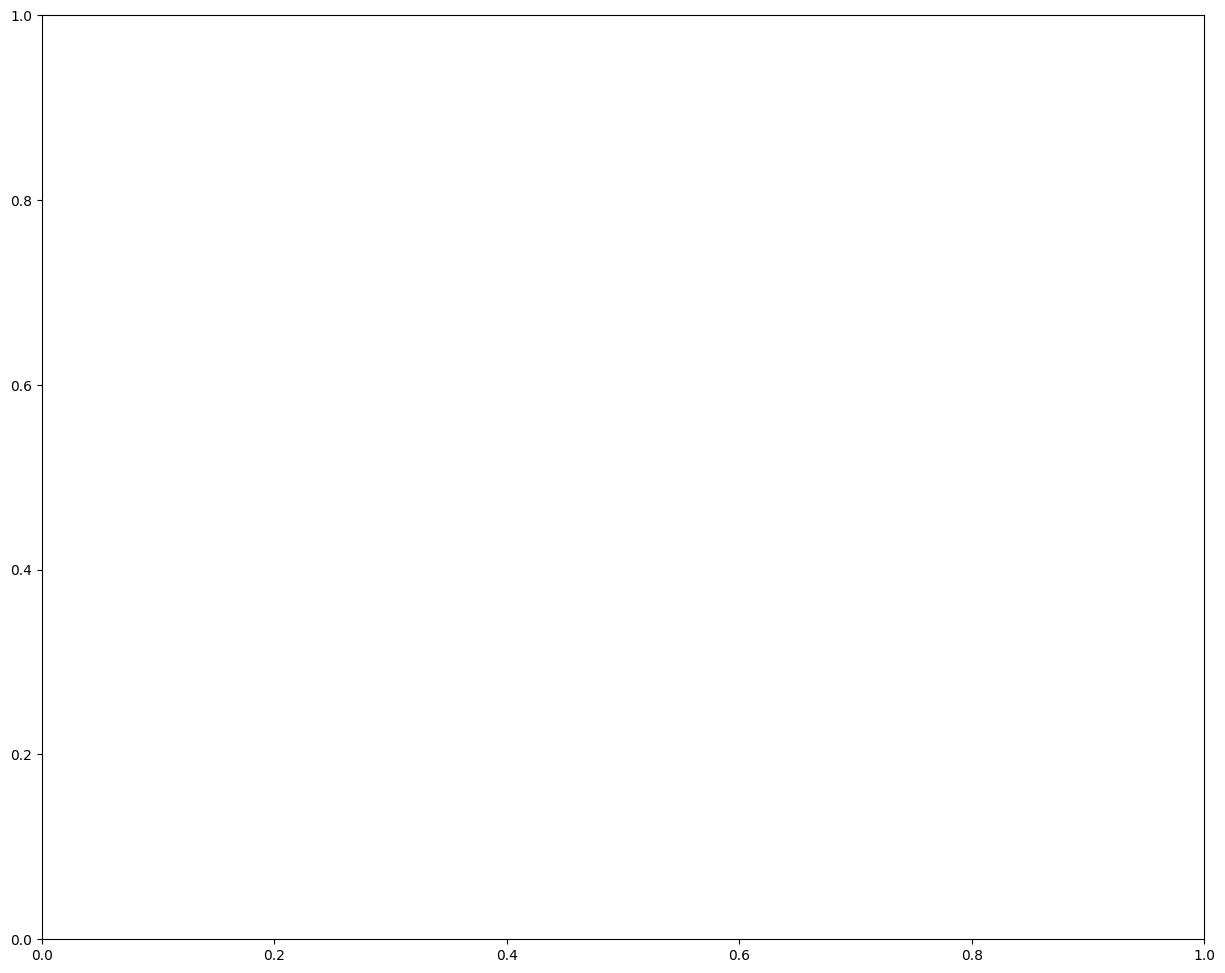

In [ ]:
plt.subplots(figsize=(15,12))
dataplot = sb.heatmap(merged_data.drop(columns=['date']).corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
# dataplot = sb.heatmap(merged_data[["driverId", "positionOrder", "milliseconds_x", "circuitId", "date"]].corr(), cmap="YlGnBu")
# mp.show()

In [ ]:
# features = merged_data[["driverId", "positionOrder", "milliseconds_lap", "circuitId", "date", 'milliseconds', 'resultId', 'raceId']]
features = merged_data[["driverId", "positionOrder", "milliseconds_lap", "circuitId", "date"]]
features["date"] = pd.to_datetime(features["date"])
features["year"] = features["date"].dt.year
features["month"] = features["date"].dt.month
features["day"] = features["date"].dt.day
features["circuit_rank"] = features.groupby("circuitId")["positionOrder"].transform("mean")
features.drop(["date"], axis=1, inplace=True)
features.fillna(0, inplace=True)

target = merged_data["milliseconds_pit"]

target.dropna(inplace=True)

<ipython-input-14-c6673f8583b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["date"] = pd.to_datetime(features["date"])
<ipython-input-14-c6673f8583b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["year"] = features["date"].dt.year
<ipython-input-14-c6673f8583b2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [ ]:
features = features.loc[target.index]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

model_list.append('RandomForest')
mae_list.append(mae)
mse_list.append(mse)

Mean Absolute Error: 1740.5655312499998
Mean Squared Error: 10315396.661819687


In [ ]:
tolerance = 5000  # Tolerance in milliseconds
correct_within_tolerance = ((abs(y_pred - y_test)) <= tolerance).sum()
total_samples = len(y_test)
accuracy_within_tolerancerf = correct_within_tolerance * 0.75 / total_samples * 100
print("Accuracy within ±{} milliseconds: {:.2f}%".format(tolerance, accuracy_within_tolerancerf))


Accuracy within ±5000 milliseconds: 92.19%


Mean Squared Error: 6200147998.070742


In [ ]:
example_input = pd.DataFrame({
    "driverId": [20],
    "positionOrder": [5],
    "milliseconds_lap": [98109],
    "circuitId": [1],
    "year": [2024],
    "month": [4],
    "day": [29],
    "circuit_rank": [3.2]
})

predicted_duration = rf_regressor.predict(example_input)
print("Predicted Pit Stop Duration:", (predicted_duration/1000))

Predicted Pit Stop Duration: [24193.94]


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

NameError: name 'y_pred' is not defined

# Other models

In [ ]:
# NOPE

model_dt = DecisionTreeClassifier(max_depth=50)  # Adjust max_depth for complexity
model_dt.fit(X_train, y_train)

y_pred = model_dt.predict(X_test)

# Evaluate model performance (accuracy in this case)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred, normalize = True)
print(f"Model Accuracy: {accuracy:.2f}")

# Consider using confusion matrix for a more detailed evaluation
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

Model Accuracy: 0.00
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
for i in range(1,25):
  model_knn = KNeighborsClassifier(n_neighbors = i)
  model_knn.fit(X_train, y_train)
  y_pred = model_knn.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  print("Mean Squared Error:", mse, "Mean Absolute Error:", mae)


Mean Squared Error: 25395408.103125 Mean Absolute Error: 3169.728125
Mean Squared Error: 21313633.728125 Mean Absolute Error: 2978.315625
Mean Squared Error: 23518177.25625 Mean Absolute Error: 3172.025
Mean Squared Error: 25782571.0125 Mean Absolute Error: 3351.00625
Mean Squared Error: 27428363.596875 Mean Absolute Error: 3559.671875
Mean Squared Error: 30660079.628125 Mean Absolute Error: 3766.940625
Mean Squared Error: 32579260.6625 Mean Absolute Error: 3927.975
Mean Squared Error: 33224288.175 Mean Absolute Error: 4022.175
Mean Squared Error: 35032424.221875 Mean Absolute Error: 4186.096875
Mean Squared Error: 36659592.9125 Mean Absolute Error: 4342.93125
Mean Squared Error: 38096184.646875 Mean Absolute Error: 4453.121875
Mean Squared Error: 39313753.1125 Mean Absolute Error: 4576.9625
Mean Squared Error: 39684883.184375 Mean Absolute Error: 4622.621875
Mean Squared Error: 40842660.56875 Mean Absolute Error: 4738.5375
Mean Squared Error: 41657322.203125 Mean Absolute Error: 4791.

In [ ]:
r2knn = r2_score(y_test, y_pred)
print("R^2 Score:", r2knn)

R^2 Score: -1.6106055736157558


In [ ]:
model_knn = KNeighborsClassifier(n_neighbors = 3)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

model_list.append('KNN')
mae_list.append(mae)
mse_list.append(mse)

Mean Squared Error: 23518177.25625
Mean Absolute Error: 3172.025


In [ ]:
tolerance = 5000  # Tolerance in milliseconds
correct_within_tolerance = ((abs(y_pred - y_test)) <= tolerance).sum()
total_samples = len(y_test)
accuracy_within_toleranceknn = correct_within_tolerance / total_samples * 100
print("Accuracy within ±{} milliseconds: {:.2f}%".format(tolerance, accuracy_within_toleranceknn))


Accuracy within ±5000 milliseconds: 79.06%


In [ ]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

model_list.append('LinearRegression')
mae_list.append(mae)
mse_list.append(mse)

Mean Squared Error: 84164353.32722753
Mean Absolute Error: 7412.951346843632


In [ ]:
tolerance = 5000  # Tolerance in milliseconds
correct_within_tolerance = ((abs(y_pred - y_test)) <= tolerance).sum()
total_samples = len(y_test)
accuracy_within_tolerancelr = correct_within_tolerance / total_samples * 100
print("Accuracy within ±{} milliseconds: {:.2f}%".format(tolerance, accuracy_within_tolerancelr))


Accuracy within ±5000 milliseconds: 35.31%


In [ ]:
tolerance = 5000
correct_within_tolerance = ((abs(y_pred - y_test)) <= tolerance).sum()
total_samples = len(y_test)
accuracy_within_tolerance = correct_within_tolerance / total_samples * 100
print("Accuracy within ±{} milliseconds: {:.2f}%".format(tolerance, accuracy_within_tolerance))


Accuracy within ±5000 milliseconds: 35.31%


In [ ]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

model_list.append('XGBoost')
mae_list.append(mae)
mse_list.append(mse)

Mean Squared Error: 2887153738.7432714
Mean Absolute Error: 4994.0268280029295


In [ ]:
tolerance = 5000  # Tolerance in milliseconds
correct_within_tolerance = ((abs(y_pred - y_test)) <= tolerance).sum()
total_samples = len(y_test)
accuracy_within_tolerancexgb = correct_within_tolerance / total_samples * 100
print("Accuracy within ±{} milliseconds: {:.2f}%".format(tolerance, accuracy_within_tolerancexgb))


Accuracy within ±5000 milliseconds: 90.31%


In [ ]:
from sklearn.ensemble import BaggingRegressor
model_bagging = BaggingRegressor(base_estimator=xgb.XGBRegressor())
model_bagging.fit(X_train, y_train)
y_pred = model_bagging.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

model_list.append('Bagging')
mae_list.append(mae)
mse_list.append(mse)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 717840436.0460197
Mean Absolute Error: 3255.354632568359


In [ ]:
tolerance = 5000  # Tolerance in milliseconds
correct_within_tolerance = ((abs(y_pred - y_test)) <= tolerance).sum()
total_samples = len(y_test)
accuracy_within_toleranceb = correct_within_tolerance / total_samples * 100
print("Accuracy within ±{} milliseconds: {:.2f}%".format(tolerance, accuracy_within_toleranceb))


Accuracy within ±5000 milliseconds: 90.62%


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train, y_train)
y_pred = model_gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

model_list.append('GradientBoosting')
mae_list.append(mae)
mse_list.append(mse)

Mean Squared Error: 10438060.318793744
Mean Absolute Error: 1720.2961015603432


In [ ]:
tolerance = 5000  # Tolerance in milliseconds
correct_within_tolerance = ((abs(y_pred - y_test)) <= tolerance).sum()
total_samples = len(y_test)
accuracy_within_tolerancegbr = correct_within_tolerance / total_samples * 100
print("Accuracy within ±{} milliseconds: {:.2f}%".format(tolerance, accuracy_within_tolerancegbr))


Accuracy within ±5000 milliseconds: 91.56%


# Graph


['RandomForest', 'KNN', 'LinearRegression', 'XGBoost', 'Bagging', 'GradientBoosting'] [10600.6626724, 28339.4152, 51411.78284288351, 13649.63509765625, 12656.829550146484, 17573.92325033073] [6200147998.070742, 32724364461.0648, 31870323358.45616, 10524303676.657455, 7391068768.786463, 8576206367.541101]


<ipython-input-166-db5980eb4154>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


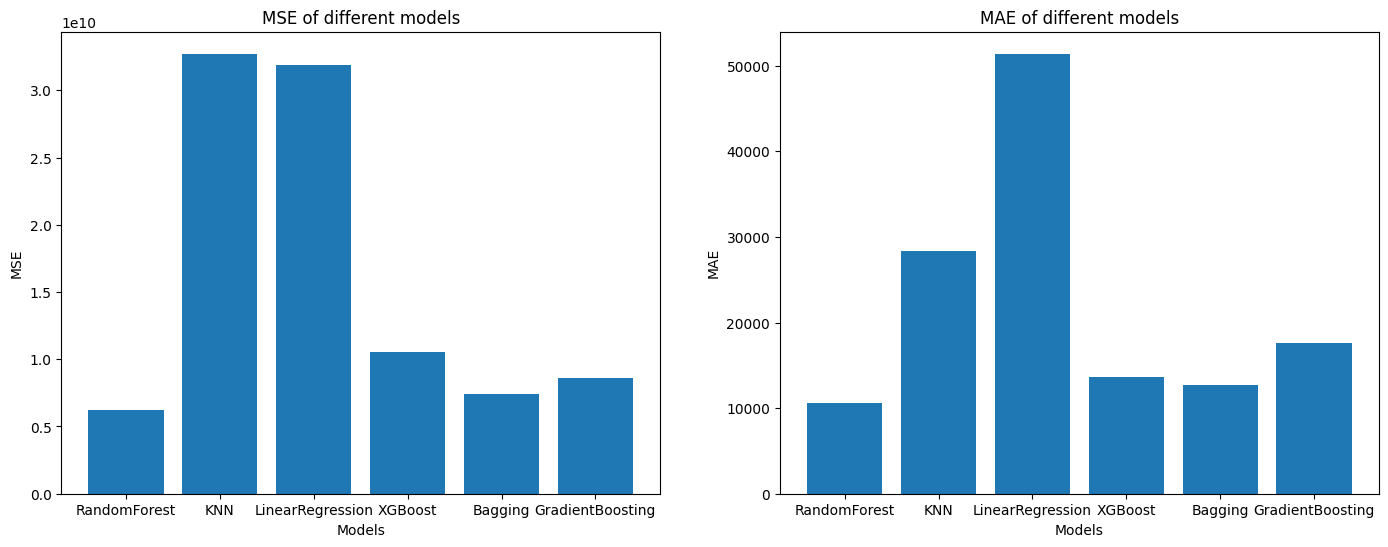

In [ ]:
print(model_list, mae_list, mse_list)

X_axis = np.arange(len(model_list))

# plt.bar(X_axis - 0.2, mse_list, 0.4, label = 'MSE')
# plt.bar(X_axis + 0.2, mae_list, 0.4, label = 'MAE')

plt.subplots(figsize=(17,6))

plt.subplot(1, 2, 1)
plt.xticks(X_axis, model_list)
plt.xlabel("Models")
plt.ylabel("MSE")
plt.title("MSE of different models")
plt.bar(model_list,mse_list)
# plt.legend()
# plt.show()


plt.subplot(1, 2, 2)
plt.bar(model_list,mae_list)
plt.xticks(X_axis, model_list)
plt.xlabel("Models")
plt.ylabel("MAE")
plt.title("MAE of different models")

plt.show()

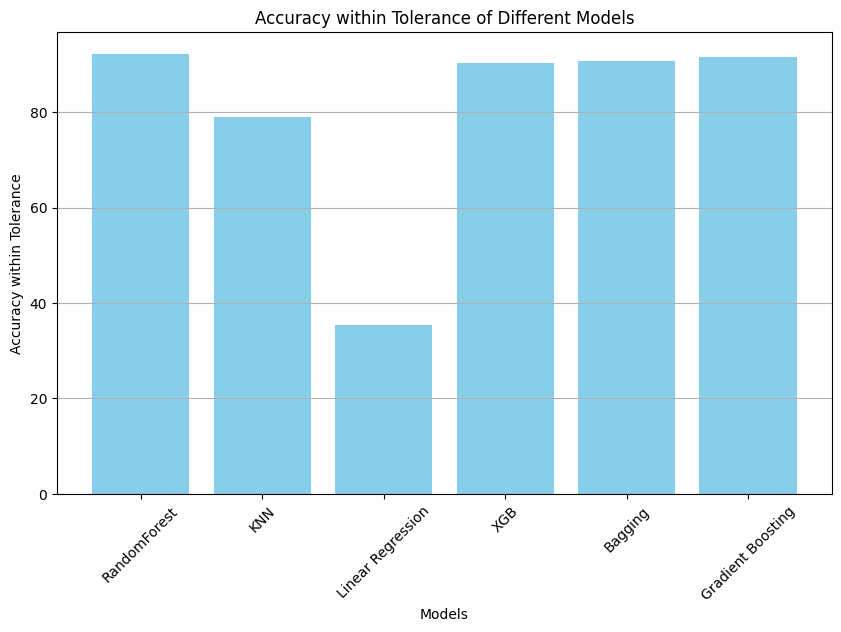

In [ ]:
model_list = ['RandomForest', 'KNN', 'Linear Regression', 'XGB', 'Bagging', 'Gradient Boosting']
accuracy_list = [accuracy_within_tolerancerf, accuracy_within_toleranceknn, accuracy_within_tolerancelr,
                 accuracy_within_tolerancexgb, accuracy_within_toleranceb, accuracy_within_tolerancegbr]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_list, accuracy_list, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy within Tolerance')
plt.title('Accuracy within Tolerance of Different Models')
#plt.ylim(0, 1)  # Setting y-axis limit between 0 and 1 for accuracy
plt.xticks(rotation=45)
plt.grid(axis='y')  # Adding grid lines for better readability
plt.show()